
## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

In [5]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import  os

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
path = os.getcwd()
print(os.listdir(os.getcwd()))
path

['CarDekho(Linear_regression).ipynb', 'dataset']


'c:\\Users\\91895\\Desktop\\Car-price-prediction\\CarDekho price estimation'

In [12]:
data = pd.read_csv(path+"/dataset/CarDekho.csv")

In [13]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [15]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


Basic EDA




c:\Users\91895\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


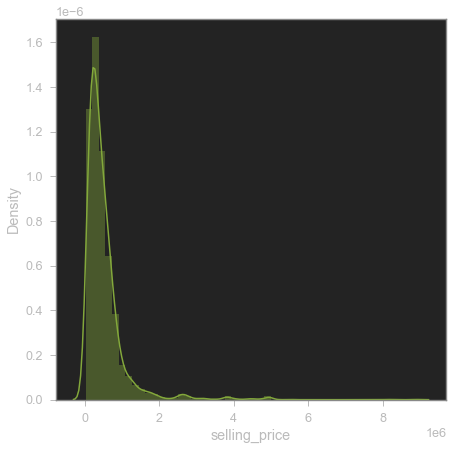

<Figure size 504x504 with 0 Axes>

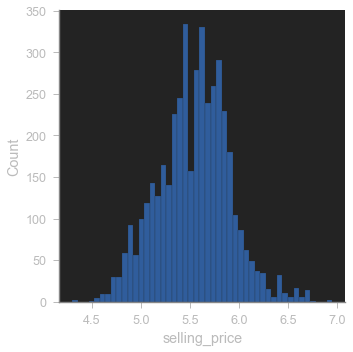

In [74]:
plt.figure(figsize = (7,7))
sns.distplot(data['selling_price'], color = 'g')
plt.figure(figsize = (7,7))
sns.displot(np.log10(data['selling_price']))
#plt.show()

In [27]:
num_features = data.describe().columns

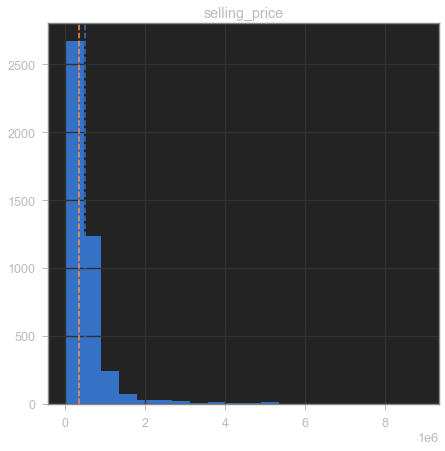

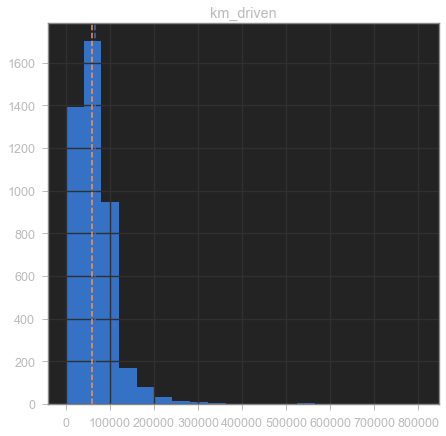

In [28]:
for col in num_features[1:]:
  fig = plt.figure(figsize = (7,7))
  ax = fig.gca()
  feature = data[col]
  feature.hist(bins = 20)
  ax.axvline(feature.mean(), color = 'b', linestyle = 'dashed')
  ax.axvline(feature.median(), color = 'y', linestyle = 'dashed')
  ax.set_title(col)

plt.show()

<AxesSubplot:>

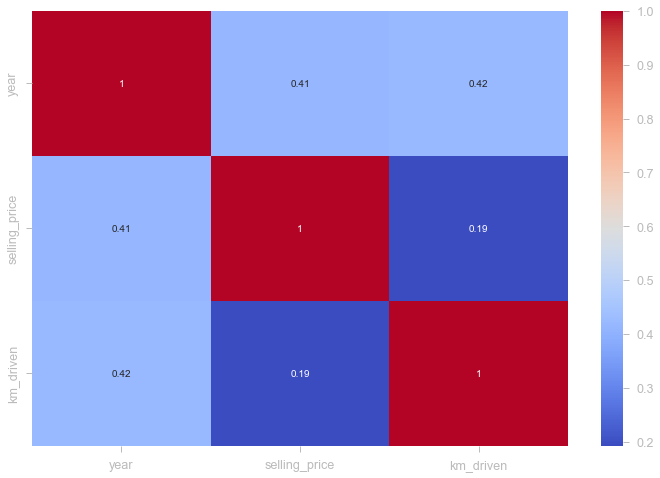

In [29]:
plt.figure(figsize = (12,8))
sns.heatmap(abs(data.corr()), annot = True, cmap = 'coolwarm')

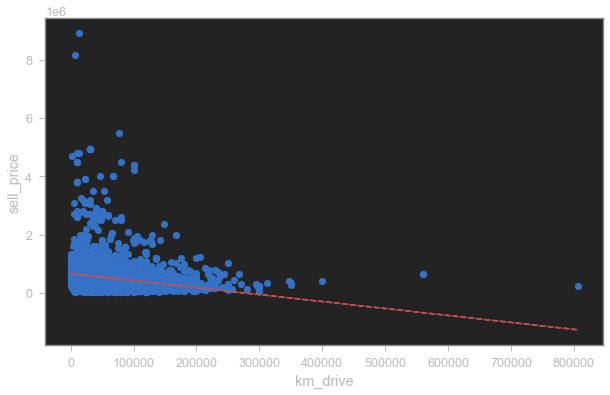

In [30]:
fig = plt.figure(figsize = (10,6))
label = data['selling_price']
feature = data['km_driven']
cor = feature.corr(label)
plt.scatter(x = feature, y = label )
plt.xlabel('km_drive')
plt.ylabel('sell_price')
z = np.polyfit(data['km_driven'], data['selling_price'], 1)
y_hat = np.poly1d(z)(data['km_driven'])
plt.plot(data['km_driven'], y_hat, "r--")
plt.show()

In [31]:
data['km_driven'].max()

806599

In [32]:
data.drop(data[data['km_driven'] >= 5*1e5].index, inplace = True)

<Figure size 864x576 with 0 Axes>

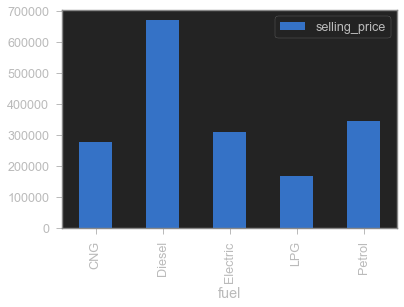

In [33]:
plt.figure(figsize = (12,8))
df_1 = pd.DataFrame(data.groupby(['fuel'])['selling_price'].mean())
df_1.plot.bar()
plt.show()

In [34]:
cat_features = data.describe(include = ['object', 'category']).columns

In [35]:
cat_features

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [36]:
data['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [37]:
data['company'] = data['name'].str.split(" ", expand=True)[0]



In [38]:
data.company.value_counts()

Maruti           1277
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: company, dtype: int64

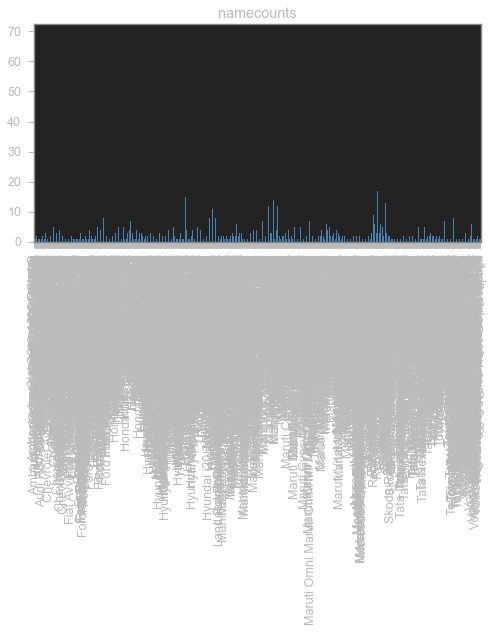

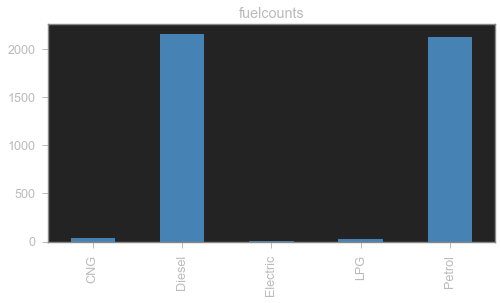

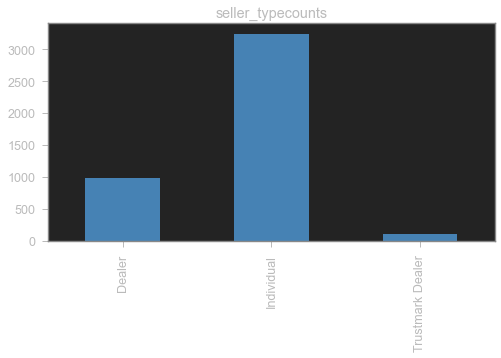

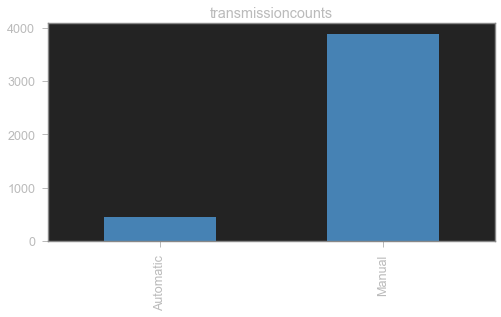

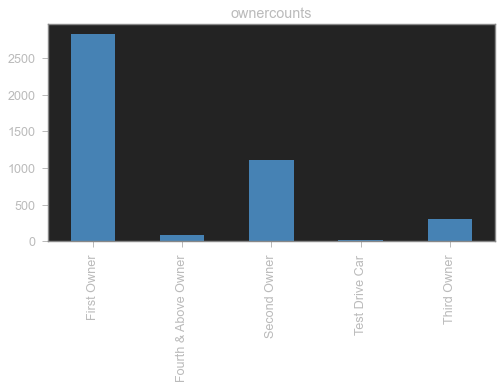

In [39]:
for col in cat_features:
  counts = data[col].value_counts().sort_index()
  fig = plt.figure(figsize = ( 8,4))
  zx = fig.gca()
  counts.plot.bar(ax = zx, color = 'steelblue')
  zx.set_title(col + 'counts')
  ax.set_xlabel(col)

plt.show()

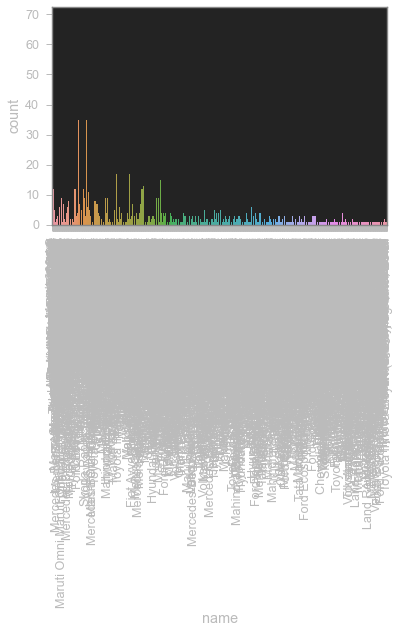

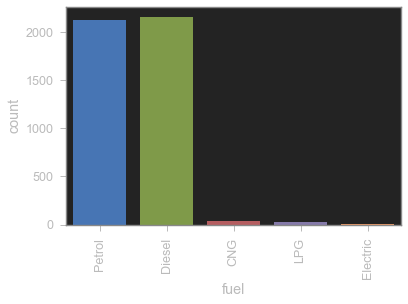

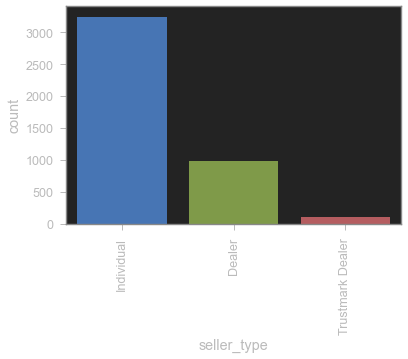

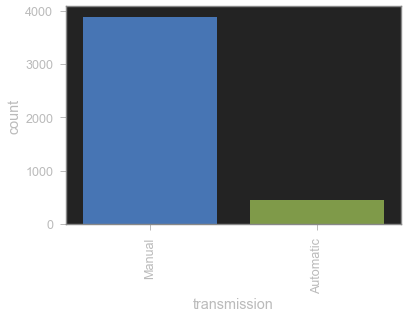

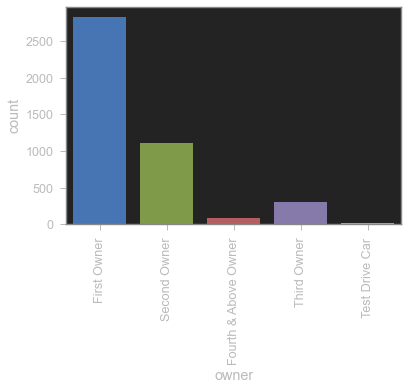

In [41]:
plt.Figure(figsize=(10,8))
for col in cat_features:
    ax = sns.countplot(x = col, data = data)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    plt.show()


In [42]:
data1  = data.copy()

In [43]:
data1.drop(columns = ['name'], inplace = True)

In [44]:
cat_features = data1.describe(include = ['object', 'category']).columns

In [45]:
print(cat_features)

Index(['fuel', 'seller_type', 'transmission', 'owner', 'company'], dtype='object')


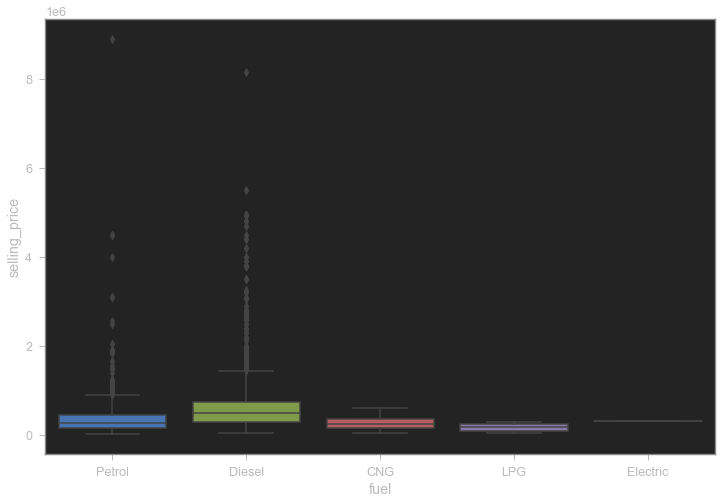

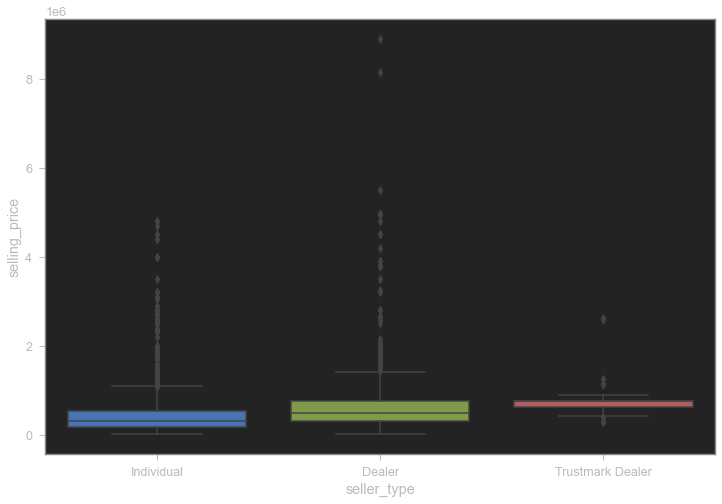

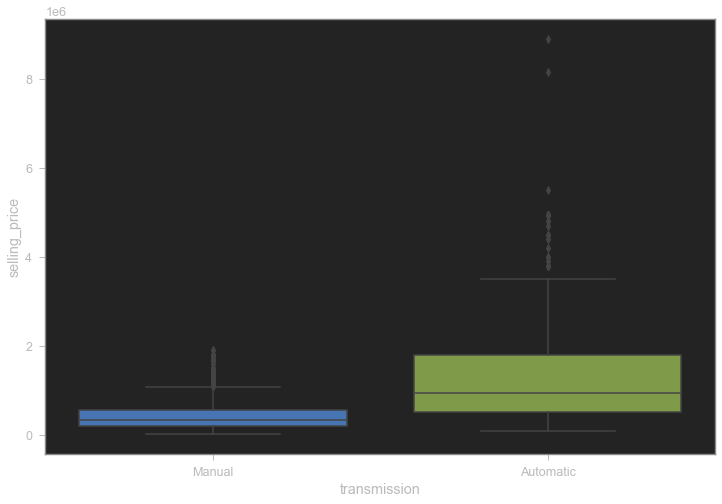

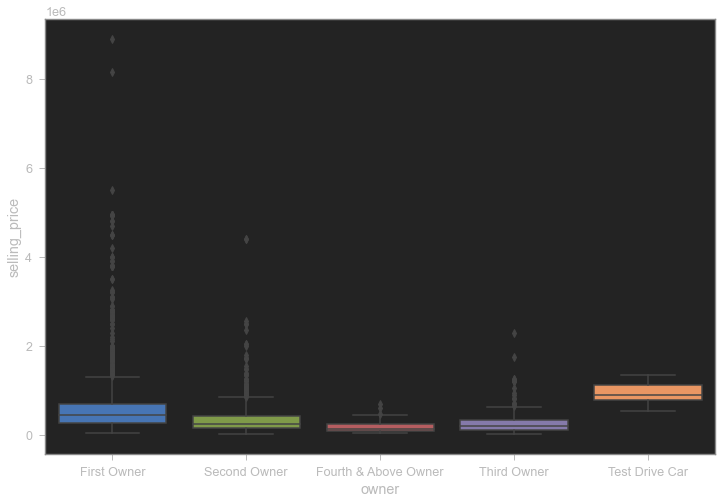

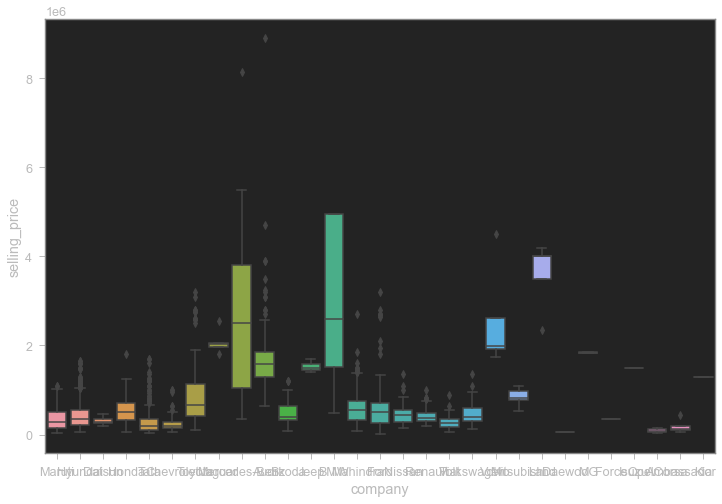

In [46]:
for col in cat_features:
  fig = plt.figure(figsize =(12,8))
  sns.boxplot(x = col, y = data1['selling_price'], data = data1)

plt.show()

<Figure size 1440x720 with 0 Axes>

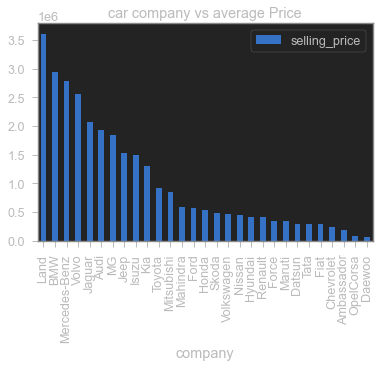

In [47]:
plt.figure(figsize  =(20,10))
df_autox = pd.DataFrame(data1.groupby(['company'])['selling_price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('car company vs average Price')
plt.show()

<Figure size 1440x720 with 0 Axes>

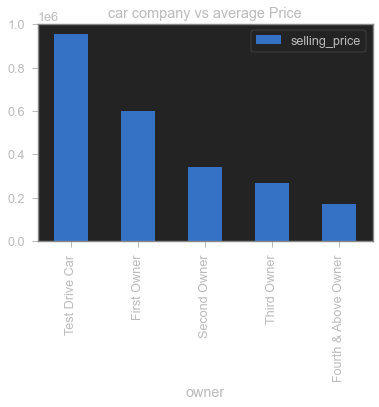

In [48]:
plt.figure(figsize  =(20,10))
df_auto = pd.DataFrame(data1.groupby(['owner'])['selling_price'].mean().sort_values(ascending = False))
df_auto.plot.bar()
plt.title('car company vs average Price')
plt.show()

In [49]:
df_autox.rename(columns = {'selling_price':"average_selling_price"}, inplace = True)

In [50]:
df_autox.head()

,average_selling_price
company,
Land,3.609800e+06
BMW,2.945385e+06
Mercedes-Benz,2.776657e+06
Volvo,2.556250e+06
Jaguar,2.069166e+06


In [51]:
data1 = data1.merge(df_autox, on = 'company', how = 'left')

In [52]:
data1['company_cat'] = data1['average_selling_price'].apply(lambda x:0 if x< 0.75*1e6 else(1 if 0.75*1e6<=x < 2*1e6 else 2 ))

In [53]:
data1['company_cat'].value_counts()

0    3969
1     279
2      89
Name: company_cat, dtype: int64

In [54]:
from sklearn.preprocessing import OrdinalEncoder
ode = OrdinalEncoder

In [55]:
data1['owner'].value_counts()

First Owner             2829
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [56]:
owner_dict = {'Test Drive Car':1,
              'First Owner':2,
              'Second Owner':3,
              'Third Owner': 4,
              'Fourth & Above Owner': 5 
}

In [57]:
data1['owner_encoded'] = data1['owner'].replace(owner_dict)

In [58]:
data1.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company,average_selling_price,company_cat,owner_encoded
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,341983.444009,0,2
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,341983.444009,0,2
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,419940.260658,0,2
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,297026.945946,0,2
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,538146.781746,0,3


In [59]:
data1 = pd.get_dummies(data1, columns = ['fuel', 'seller_type', 'transmission'], prefix = ['fuel_type ', 'seller_type  ','transmission_type '])

In [60]:
data1.head()

,year,selling_price,km_driven,owner,company,average_selling_price,company_cat,owner_encoded,fuel_type _CNG,fuel_type _Diesel,fuel_type _Electric,fuel_type _LPG,fuel_type _Petrol,seller_type _Dealer,seller_type _Individual,seller_type _Trustmark Dealer,transmission_type _Automatic,transmission_type _Manual
0,2007,60000,70000,First Owner,Maruti,341983.444009,0,2,0,0,0,0,1,0,1,0,0,1
1,2007,135000,50000,First Owner,Maruti,341983.444009,0,2,0,0,0,0,1,0,1,0,0,1
2,2012,600000,100000,First Owner,Hyundai,419940.260658,0,2,0,1,0,0,0,0,1,0,0,1
3,2017,250000,46000,First Owner,Datsun,297026.945946,0,2,0,0,0,0,1,0,1,0,0,1
4,2014,450000,141000,Second Owner,Honda,538146.781746,0,3,0,1,0,0,0,0,1,0,0,1


In [61]:
X = data1.drop(columns = ['selling_price', 'owner', 'company', 'average_selling_price'
                          ], axis = 1)

In [62]:
X.head()

,year,km_driven,company_cat,owner_encoded,fuel_type _CNG,fuel_type _Diesel,fuel_type _Electric,fuel_type _LPG,fuel_type _Petrol,seller_type _Dealer,seller_type _Individual,seller_type _Trustmark Dealer,transmission_type _Automatic,transmission_type _Manual
0,2007,70000,0,2,0,0,0,0,1,0,1,0,0,1
1,2007,50000,0,2,0,0,0,0,1,0,1,0,0,1
2,2012,100000,0,2,0,1,0,0,0,0,1,0,0,1
3,2017,46000,0,2,0,0,0,0,1,0,1,0,0,1
4,2014,141000,0,3,0,1,0,0,0,0,1,0,0,1


In [63]:
from scipy.stats import zscore

In [64]:
X.apply(zscore)

,year,km_driven,company_cat,owner_encoded,fuel_type _CNG,fuel_type _Diesel,fuel_type _Electric,fuel_type _LPG,fuel_type _Petrol,seller_type _Dealer,seller_type _Individual,seller_type _Trustmark Dealer,transmission_type _Automatic,transmission_type _Manual
0,-1.444796,0.095019,-0.286457,-0.628022,-0.096482,-0.991962,-0.015186,-0.073017,1.021678,-0.544219,0.580456,-0.155193,-0.339406,0.339406
1,-1.444796,-0.359329,-0.286457,-0.628022,-0.096482,-0.991962,-0.015186,-0.073017,1.021678,-0.544219,0.580456,-0.155193,-0.339406,0.339406
2,-0.258667,0.776540,-0.286457,-0.628022,-0.096482,1.008103,-0.015186,-0.073017,-0.978782,-0.544219,0.580456,-0.155193,-0.339406,0.339406
3,0.927461,-0.450199,-0.286457,-0.628022,-0.096482,-0.991962,-0.015186,-0.073017,1.021678,-0.544219,0.580456,-0.155193,-0.339406,0.339406
4,0.215784,1.707953,-0.286457,0.775963,-0.096482,1.008103,-0.015186,-0.073017,-0.978782,-0.544219,0.580456,-0.155193,-0.339406,0.339406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4332,0.215784,0.322193,-0.286457,0.775963,-0.096482,1.008103,-0.015186,-0.073017,-0.978782,-0.544219,0.580456,-0.155193,-0.339406,0.339406
4333,0.215784,0.322193,-0.286457,0.775963,-0.096482,1.008103,-0.015186,-0.073017,-0.978782,-0.544219,0.580456,-0.155193,-0.339406,0.339406
4334,-0.970344,0.390345,-0.286457,0.775963,-0.096482,-0.991962,-0.015186,-0.073017,1.021678,-0.544219,0.580456,-0.155193,-0.339406,0.339406
4335,0.690235,0.549366,-0.286457,-0.628022,-0.096482,1.008103,-0.015186,-0.073017,-0.978782,-0.544219,0.580456,-0.155193,-0.339406,0.339406


In [65]:
y = np.log10(data1['selling_price'])

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [67]:
print(X_train.shape, X_test.shape)

(3469, 14) (868, 14)


In [68]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [69]:
y_pred_test = reg.predict(X_test)
y_pred_train = reg.predict(X_train)

In [216]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(10**(y_test), 10**(y_pred_test))

RMSE = np.sqrt(MSE)
print('MSE', MSE)
print('RMSE', RMSE)

MSE 79905419179.87376
RMSE 282675.4661796346


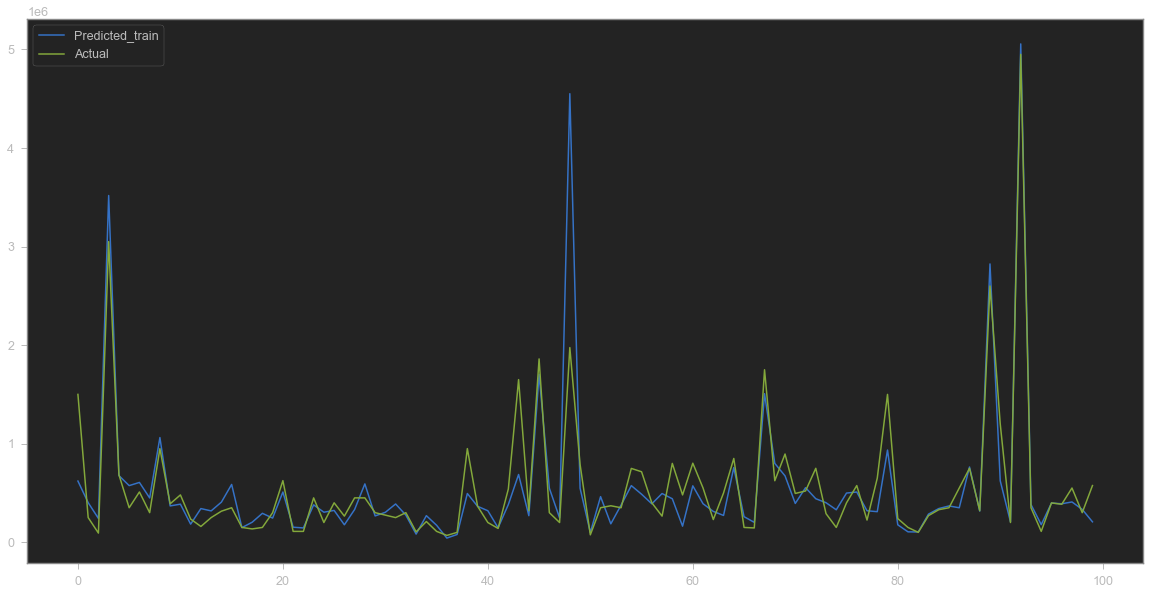

In [71]:
plt.figure(figsize=(20,10))
plt.plot(10**(y_pred_train[:100]))
plt.plot(np.array(10**(y_train[:100])))

plt.legend(["Predicted_train","Actual"])
plt.show()

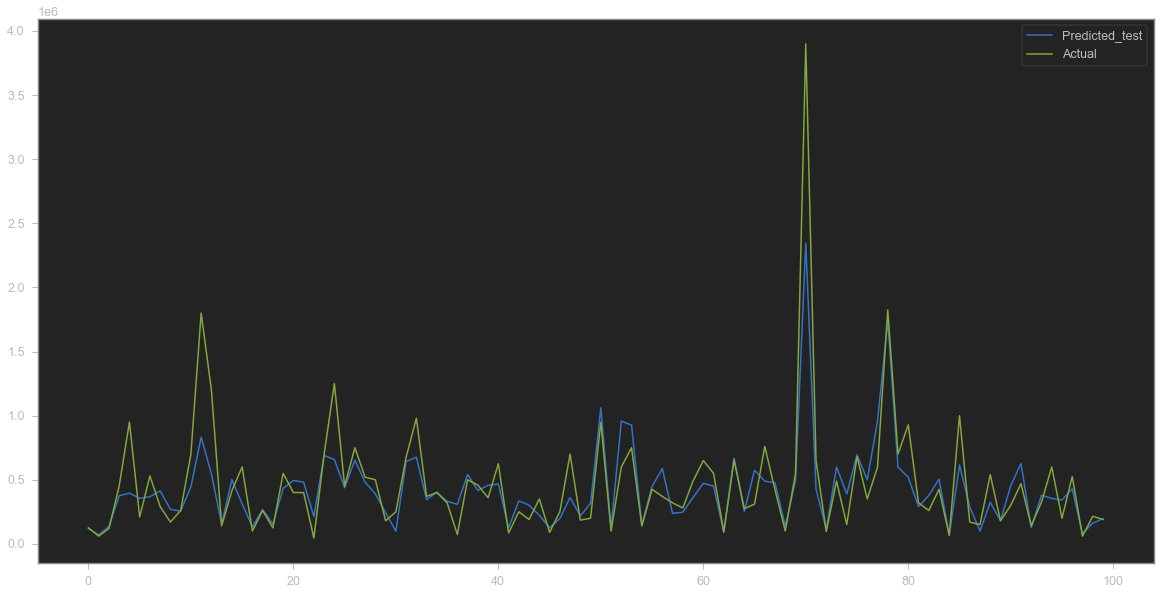

In [72]:
plt.figure(figsize=(20,10))
plt.plot(10**(y_pred_test[:100]))
plt.plot(np.array(10**(y_test[:100])))
plt.legend(["Predicted_test","Actual"])
plt.show()

In [191]:
from sklearn.linear_model import Ridge
reg = Ridge().fit(X_train, y_train)
y_pred_ridge = reg.predict(X_test)


In [192]:
MSE = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
RMSE = np.sqrt(MSE)
print('MSE', MSE)
print('RMSE', RMSE)

MSE 79946606613.29086
RMSE 282748.30965593917


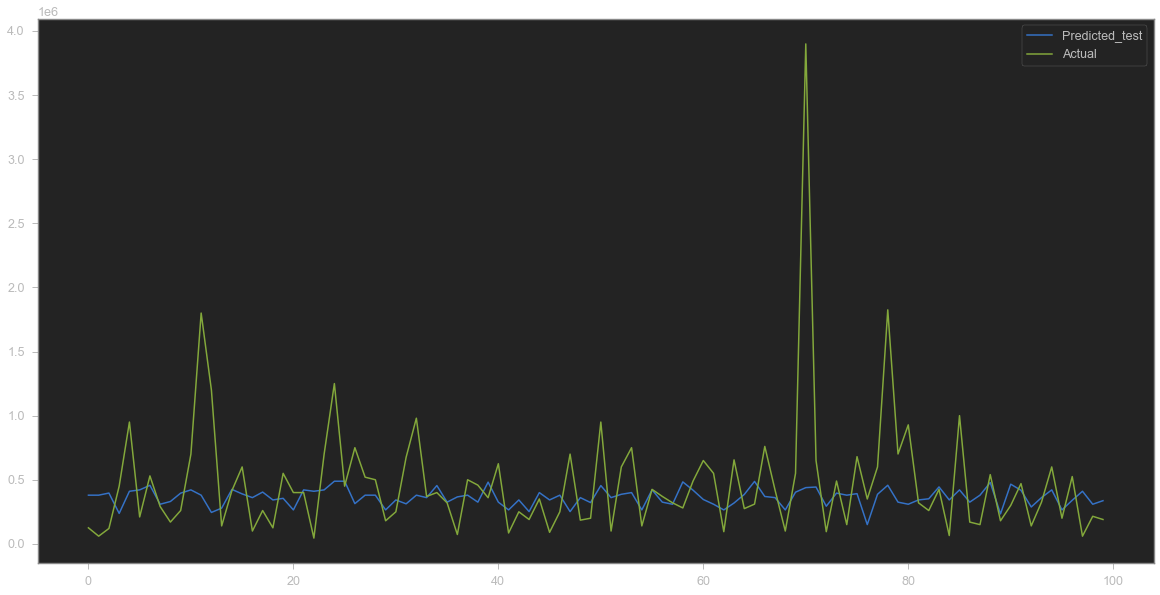

In [193]:
plt.figure(figsize=(20,10))
plt.plot(10**(y_pred_lasso[:100]))
plt.plot(np.array(10**(y_test[:100])))
plt.legend(["Predicted_test","Actual"])
plt.show()

In [211]:
#DNN
def dnn_model():
      model = keras.Sequential([
        keras.layers.Flatten(input_shape=[X_train.shape[-1]]),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1)
      ])
      model.compile(loss='mean_squared_error',optimizer='adam')
      return model


In [212]:
model = dnn_model()
fit = model.fit(
    X_train,
    y_train,
    validation_split=0.20,
    verbose=0, epochs=100)

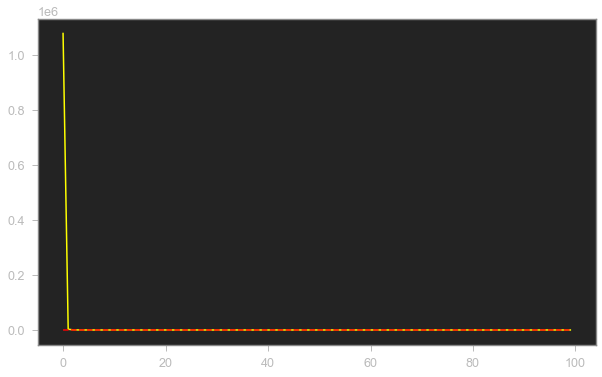

In [213]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(fit.history['loss'], color='yellow')
plt.plot(fit.history['val_loss'], color='red' , ls = '--')
plt.show()

In [214]:
y_pred_nn = model.predict(X_test).flatten()

MSE = mean_squared_error(10**(y_test), 10**(y_pred_nn))
RMSE = np.sqrt(MSE)
print('MSE', MSE)
print('RMSE', RMSE)

28/28 [==============================] - 0s 2ms/step
MSE 547009713780.56696
RMSE 739601.0504187829


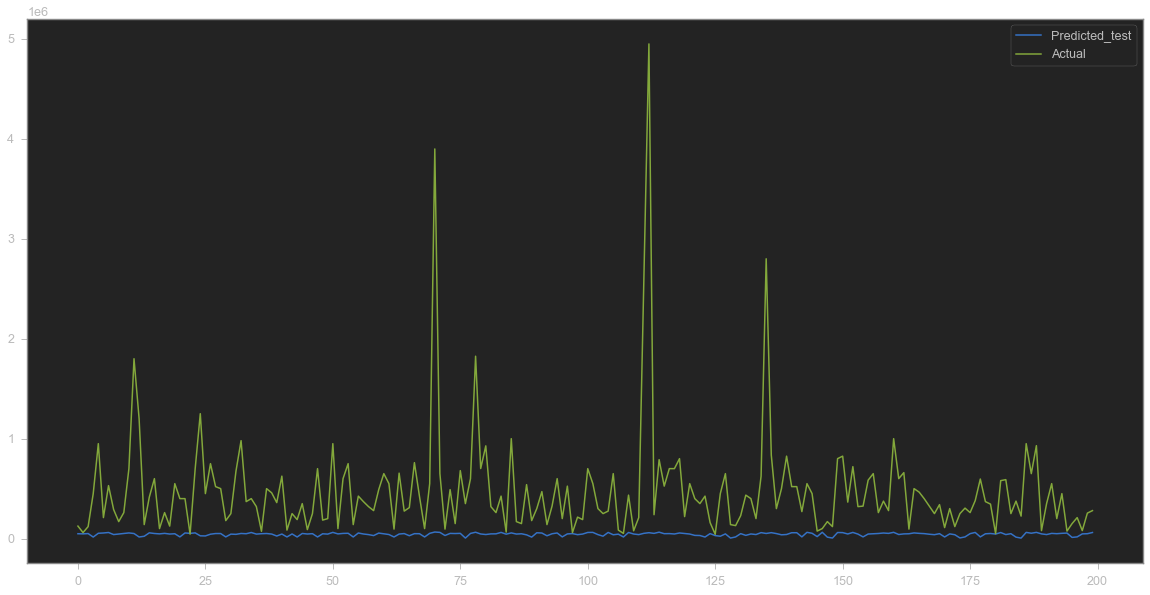

In [215]:
plt.figure(figsize=(20,10))
plt.plot(10**(y_pred_nn[:200]))
plt.plot(np.array(10**(y_test[:200])))
plt.legend(["Predicted_test","Actual"])
plt.show()